# Linear AutoEncoders for Image Classification 

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__



'2.16.1'

## import dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_test[0]

7

## Visualize the Images

8


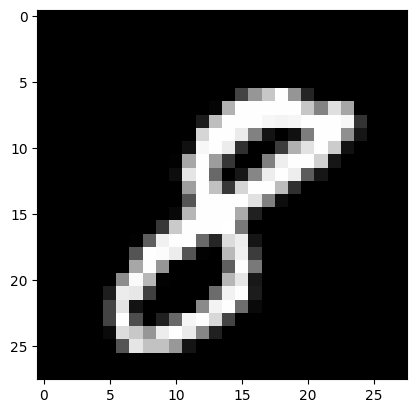

In [13]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray') ;

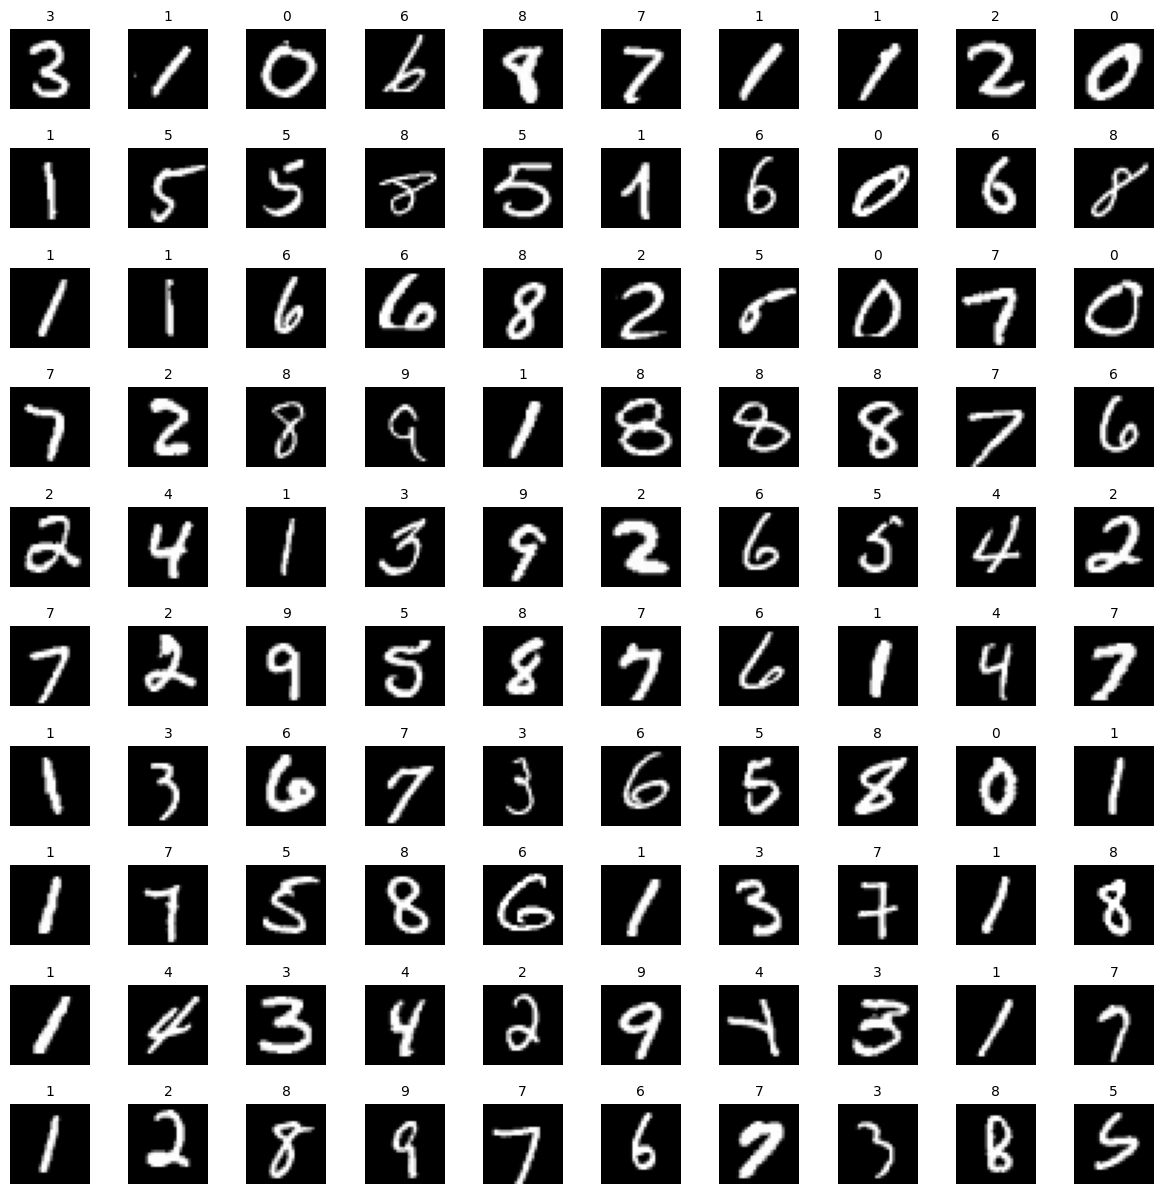

In [25]:
width, height = 10, 10
fig, axis = plt.subplots(height, width, figsize=(15, 15))   
# print(axis.shape) # represent position of each subplot. We want it in a Vector form
axis = axis.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 59999)
    axis[i].imshow(X_train[index], cmap='gray')
    axis[i].set_title(y_train[index], fontsize=10)  
    axis[i].axis('off') 
plt.subplots_adjust(hspace=0.5)


## Preprocessing the Images

In [21]:
X_train[0].min(), X_train[0].max() # 255 is a large value for a pixel. We need to normalize it as in neural networks, we deal with alot of matrix multiplication and large values can cause overflow or slow convergence or take alot of time to compute/calculate

(0, 255)

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
X_train[0].min(), X_train[0].max() 

(0.0, 1.0)

In [24]:
X_train.shape, X_test.shape # as we are building a linear autoencoder, we need to flatten the images as linear autoencoder takes a vector as input

((60000, 28, 28), (10000, 28, 28))

In [26]:
X_train = X_train.reshape(X_train.shape[0],  X_train.shape[1] * X_train.shape[2])  # 60000 is the total number of images, 28, 28 is width and height of the images. We want to convert each image into a vector so multiply width by height for each image    
X_train.shape

(60000, 784)

In [27]:
X_test = X_test.reshape(X_test.shape[0],  X_test.shape[1] * X_test.shape[2])  # 10000 is the total number of images, 28, 28 is width and height of the images. We want to convert each image into a vector so multiply width by height for each image    
X_test.shape

(10000, 784)

Now we have 60000 images with each image being represented by a vector of it's pixels

## Build and Train Linear Autoencoder

In [29]:
# General Structure of the Model

# Note: Input and Output Layer must have same size. Numbers displayed below are the number of neurons(Pixels) in each layer


# Input Layer                        Output Layer
#  |                                      |
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
# |___________________||___________________|
#        Encoder              Decoder

We use Sigmoid function here as it returns a value between 0 and 1. In Autoencoders,we compare the original image with the reconstructed image, so basically comparing the true value of a pixel with the predicted one. This makes it so we only need a single scalar value as a result of comparing true and predicted value to compute the loss. And when using sigmoid function, it is better to use binary crossentropy function as it returns probability of the positive class.

In [89]:
# autoencoder = Sequential()

# # Encoder
# #  ? autoencoder.add(Dense(units=128, activation='relu', input_dim=784)) 
# autoencoder.add(Dense(units=128, activation='relu', input_shape=(784,))) 
# autoencoder.add(Dense(units=64, activation='relu'))
# autoencoder.add(Dense(units=32, activation='relu')) # Encoded Image


# # Decoder
# autoencoder.add(Dense(units=64, activation='relu'))
# autoencoder.add(Dense(units=128, activation='relu'))
# autoencoder.add(Dense(units=784, activation='sigmoid')) # Sigmoid is used to normalize the pixel values between 0 and 1. It returns a value between 0 and 1


Using Functional API technique as it allows for easy accessing of input layer

In [101]:

# Define the autoencoder using the Functional API
# Input Layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded_output = Dense(32, activation='relu', name='encoded_layer')(encoded) # Encoded Image

# Decoder
decoded = Dense(64, activation='relu')(encoded_output)
decoded = Dense(128, activation='relu')(decoded)
decoded_output = Dense(784, activation='sigmoid')(decoded)

# Combining the Encoder and Decoder to form the Autoencoder
autoencoder = Model(inputs=input_img, outputs=decoded_output)

In [102]:
autoencoder.summary()

Model: "functional_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_layer (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # binary_crossentropy is used as we are comparing pixel values which are between 0 and 1. If we were comparing pixel values between 0 and 255, we would have used mean_squared_error

In [105]:
# autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test)) # We can run the model again to see if the loss decreases further
autoencoder.fit(X_train, X_train, epochs=50)



Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.0107 - loss: 0.1177
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.0118 - loss: 0.1041
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.0135 - loss: 0.0980
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.0139 - loss: 0.0948
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.0127 - loss: 0.0925
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.0136 - loss: 0.0906
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.0131 - loss: 0.0890
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.0136 - loss: 0.0881
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.0146 - loss: 0.0872
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.0153 - loss: 0.0866
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.0146 - loss: 0.0860
Epoch 12

## Encoding the Images

We want to see what the encoded image looks like, so making an encoder model

In [106]:
autoencoder.input

<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor_386>

In [120]:
autoencoder.get_layer('encoded_layer').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_389>

In [108]:
encoder = Model( inputs = autoencoder.input, outputs = autoencoder.get_layer('encoded_layer').output)  

In [109]:
encoder.summary()

Model: "functional_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_layer (Dense)           │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In Keras, when you define a model, it automatically infers the connectivity between layers based on the inputs and outputs specified. In your case, when you create the encoder model using the Model constructor, you specify the inputs as autoencoder.input and the outputs as autoencoder.get_layer('encoded_layer').output.

The autoencoder.input represents the input layer of your autoencoder model, and 'encoded_layer' is the name of the layer whose output you want to extract as the encoded representation. When you specify these inputs and outputs, Keras automatically traces back through the model to find the necessary connections between layers to satisfy these conditions.

So, when you create the encoder model, Keras identifies all the layers that are required to connect the input to the output layer you specified, and it constructs the encoder model accordingly. This includes all the layers necessary to propagate the input through the model until it reaches the 'encoded_layer' and extracts its output.

Therefore, even though you only explicitly specified the input and output layers when creating the encoder model, Keras internally includes all the intermediate layers required for the propagation of the input data through the network until it reaches the desired output layer.

In [110]:
X_test[0].shape # Inorder to visualize the image, we need to reshape it back to 28, 28. A matrix

(784,)

In [122]:
print(X_test[0].reshape(28, 28).shape)

(28, 28)


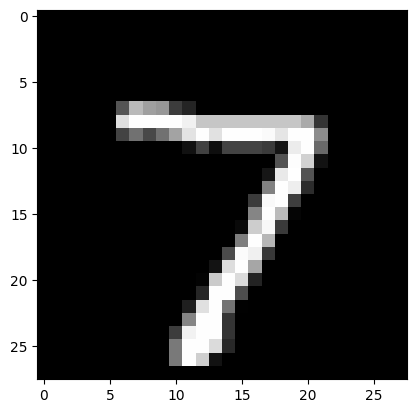

In [111]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray') ;

Remember that during the prediction process, the weights of all the layers that were learned by training autoencoder model are still saved and applied in encoder. So when we make a Model encoder using layers of autoencoder directly ex: (autoencoder.input), it will load the required layers from autoencoder along with the weights, so now encoder will produce output according to the training autoencoder recieved.

In [124]:
X_test[0].shape # Vector

(784,)

In [125]:
X_test[0].reshape(1, -1).shape # Converted to Batch Size of 1

(1, 784)

In [112]:
encoded_image = encoder.predict(X_test[0].reshape(1, -1)) # We need to reshape the image to a vector as the encoder takes a vector as input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [113]:
encoded_image, encoded_image.shape # The image of 784 pixels has been compressed to 32 pixels [Encoded]

(array([[ 0.        ,  3.9920466 ,  6.555349  ,  4.0151234 ,  6.0973105 ,
          4.5673614 ,  0.        ,  6.2730465 ,  6.0606346 ,  0.        ,
          6.1565723 ,  7.286253  ,  4.029921  ,  4.3439655 ,  1.4594754 ,
          2.284462  ,  6.471749  , 11.39993   ,  3.5573487 ,  4.043675  ,
          4.0397477 ,  0.        ,  0.54725933,  3.8197339 ,  3.0311816 ,
          6.2697363 ,  0.        ,  1.9931811 ,  2.4617097 ,  3.5227027 ,
          0.        ,  1.7530441 ]], dtype=float32),
 (1, 32))

In [116]:
encoded_image.shape # The image is a vector of 32 pixels, to visualize it, we need to convert it into a matrix of 8x4 (= 32)

(1, 32)

In [154]:
encoded_image.reshape(8, 4).shape # Equivalent to 1 x 32

(8, 4)

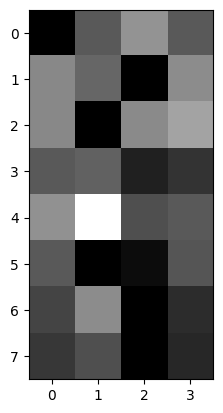

In [117]:
plt.imshow(encoded_image.reshape(8, 4), cmap='gray') ;

## Decoding the Image

In [118]:
autoencoder.summary()

Model: "functional_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_layer (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

Now making the Decoder, we need an input layer for the decoder. the input layer of decoder will start from the end of the encoder's layer. so that means, the input layer of Decoder is "encoded_layer (Dense)". This is not an input layer, rather just a normal Dense layer and it cant be used as an input layer for Decoder. 

So we will now create a custom input layer for decoder, then we will want to connect it with the output layer but since we created a custom input layer, it wont be connected with the output layer as it is not a part of the autoencoder structuer. Hence we will also manually connect the custom input layer with the output layer of the autoencoder by creating a link with the custom input layer and each layer that comes between the custom input layer of decoder (output layer of encoder) and the output layer. The custom input layer is equivalent to the output of the Encoder. 

Since in the input layer, we dont do any computations, this means the data will not be effected by the custom input layer. But as the rest of the layers are from the autencoder model, they will retain their weights from training and will help in decoding the image.

In [128]:
input_layer_decoder = Input(shape=(32,)) # Custom Input Layer for the Decoder. Equivalent to the Output layer of Encoder (encoded_layer)

# We can access each layer by indexing the structyure of the model too
decoder_layer1 = autoencoder.layers[4] # dense_113
decoder_layer2 = autoencoder.layers[5] # dense_114
decoder_layer3 = autoencoder.layers[6] # dense_115

# Now we gotta link the input layer to the output layer by connecting all layers that come between them in order
decoder_layer_links = decoder_layer3( decoder_layer2( decoder_layer1(input_layer_decoder) ) ) # input -> dense_113 -> dense_114 -> dense_115 (output)

# Make model
decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer_links)


Since the input layer here takes in the result of the output of encoder, it has 0 params as it only takes input.

In [130]:
decoder.summary()  

Model: "functional_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
decoded_image = decoder.predict(encoded_image) # Decoding the encoded image to get the original image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [132]:
decoded_image.shape

(1, 784)

In [133]:
decoded_image.reshape(28, 28).shape

(28, 28)

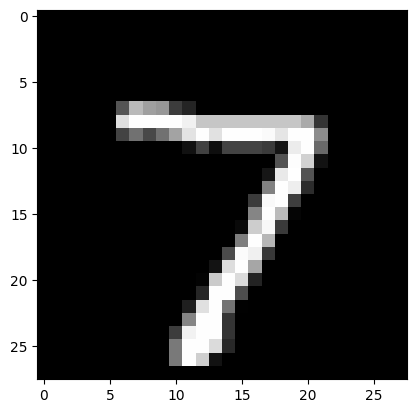

In [134]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray') ;

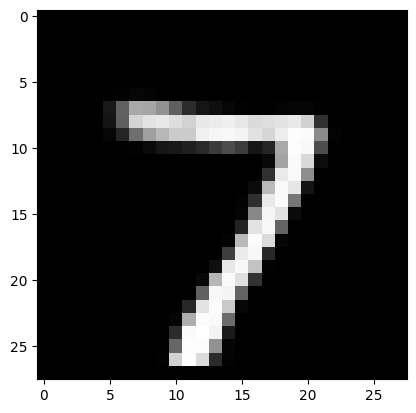

In [135]:
plt.imshow(decoded_image.reshape(28, 28), cmap='gray') ;

## Encode and Decode the Test images

In [137]:
X_test.shape

(10000, 784)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


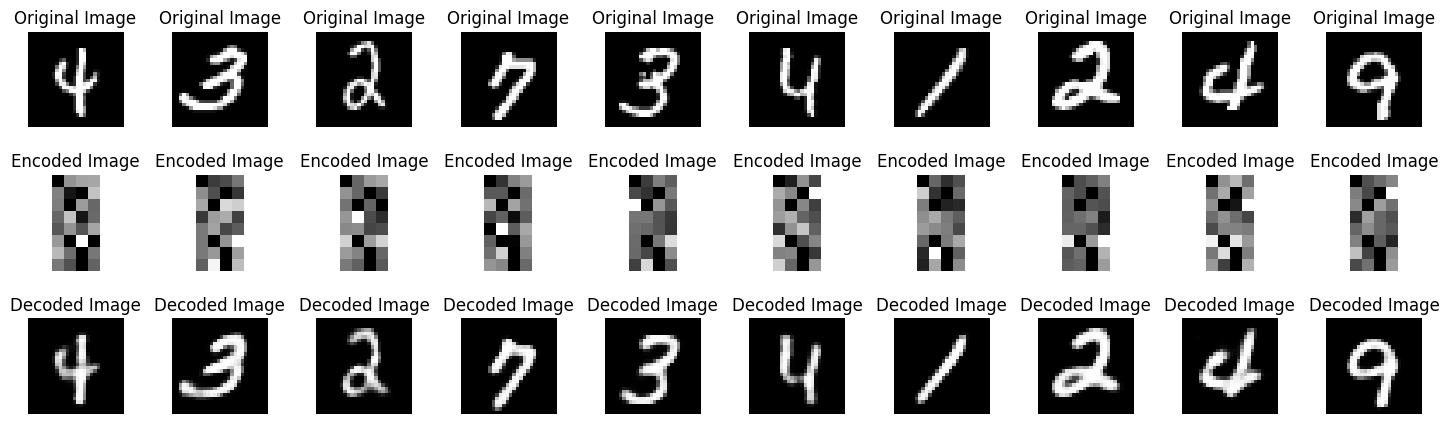

In [161]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size=n_images)

plt.figure(figsize=(18, 18))

for i, image_index in enumerate(test_images):
    # Original Image
    ax = plt.subplot(10, 10, i + 1) # subplot (nrows, ncols, index) nrows=rows of subplots, index starts at 1
    plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Encoded Image
    ax = plt.subplot(10, 10, i + 1 + n_images) # adding n_images to skip the first row as first row as 10 images
    encoded_image = encoder.predict(X_test[image_index].reshape(1, -1)) # Convert image into batch size of 1
    plt.imshow(encoded_image.reshape(8, 4), cmap='gray')
    plt.title('Encoded Image')
    plt.axis('off')

    # Decoded Image
    ax = plt.subplot(10, 10, i + 1 + n_images * 2)
    decoded_image = decoder.predict(encoded_image)
    plt.imshow(decoded_image.reshape(28, 28), cmap='gray')
    plt.title('Decoded Image')
    plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.5);